In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

print 'python2'

python2


In [34]:


x = tf.arg_max([[2,0,1],
               [4,9,6],
               [3,7,9]],dimension=1,name=None)

with tf.Session() as sess:
    print sess.run(x)

[0 1 2]


In [ ]:

tf.add(x,y,name=None)

x = tf.add_n([[1, 2],   ==> [4 6]
              [3, 4]])

# tensor 'a' is [[1, 2], [3, 4]]
# tensor `b` is [[5, 0], [0, 6]]
tf.accumulate_n([a, b, a]) ==> [[7, 4],
                                [6, 14]]

x = tf.argmax([[2,0,1],                 
               [4,9,6],
               [3,7,9]],axis=1,name=None)   ==> [0 1 2]



In [ ]:
# tf_math
tf.abs（x）

In [2]:
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

### create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
### create tensorflow structure end ###

sess = tf.Session()
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
print sess.run(loss)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print step, sess.run(Weights), sess.run(biases)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.55685
0 [-0.39370239] [ 0.70380229]
20 [-0.04767764] [ 0.37204927]
40 [ 0.0609101] [ 0.31907126]
60 [ 0.089653] [ 0.30504814]
80 [ 0.09726118] [ 0.30133623]
100 [ 0.09927504] [ 0.30035371]
120 [ 0.0998081] [ 0.30009362]
140 [ 0.0999492] [ 0.30002481]
160 [ 0.09998656] [ 0.30000657]
180 [ 0.09999644] [ 0.30000174]
200 [ 0.09999905] [ 0.30000049]


In [3]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                       [2]])
product = tf.matmul(matrix1, matrix2)

# method 1
sess = tf.Session()
result = sess.run(product)
print result
sess.close()

# method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print result2

[[12]]
[[12]]


In [4]:
state = tf.Variable(0, name='counter')
# print state.name

one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# init = tf.initialize_all_variables() # important
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print sess.run(update)

2
4
6


In [5]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print sess.run(output, feed_dict={input1:[7.], input2:[2.]})
    

[ 14.]


Instructions for updating:
Use `tf.global_variables_initializer` instead.


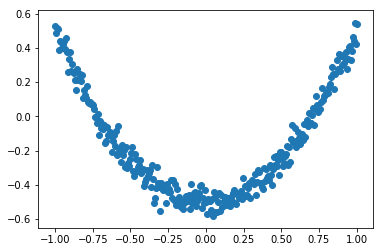

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, None])
ys = tf.placeholder(tf.float32, [None, None])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        # print sess.run(loss, feed_dict={xs: x_data, ys: y_data})
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        
        plt.pause(0.1)
        

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print mnist

############################3
def add_layer(inputs, in_size, out_size, activation_function=None,para=1):###
    # add one more layer and return the output of this layer
    Weights = tf.Variable(para*tf.random_uniform([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.01,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255. # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
L1 = add_layer(xs, 784, 100, activation_function=tf.nn.tanh, para=0.01)
L2 = add_layer(L1, 100, 100, activation_function=tf.nn.tanh, para=0.01)
prediction = add_layer(L2, 100, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(10001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 1000 == 0:
        print compute_accuracy(mnist.test.images, mnist.test.labels)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f801f96a550>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8041fddd90>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f80421b5450>)
0.098
0.9507
0.965
0.9727
0.9744
0.9766
0.9772
0.9778
0.978
0.9791
0.979


In [13]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print mnist
###############################
def add_layer(inputs, in_size, out_size, activation_function=None,para=0.1):######
    # add one more layer and return the output of this layer
    Weights = tf.Variable(para*tf.random_normal([in_size, out_size]))########
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.01,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255. # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
L1 = add_layer(xs, 784, 100, activation_function=tf.nn.tanh, para=0.01)
L2 = add_layer(L1, 100, 100, activation_function=tf.nn.tanh, para=0.01)
prediction = add_layer(L2, 100, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(10001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 1000 == 0:
        print compute_accuracy(mnist.test.images, mnist.test.labels)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f801c113f90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f801c2d5ad0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f801c12a210>)
0.2618
0.9564
0.9692
0.9753
0.9771
0.977
0.9775
0.9767
0.9788
0.9789
0.978


In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1)) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 32, 64]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(2001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 1000 == 0:
        print compute_accuracy(mnist.test.images, mnist.test.labels)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.0685
0.9681
0.9794


In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

xs = tf.placeholder(tf.float32, [None,784])
ys = tf.placeholder(tf.float32, [None,10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1,28,28,1])


Weight_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1), dtype=tf.float32, name='conv_1_w')
biases_conv1 = tf.Variable(tf.constant(0.1, shape=[32]), dtype=tf.float32, name="conv_1_b")
conv_1 = tf.nn.relu(tf.nn.conv2d(x_image, Weight_conv1, strides=[1,1,1,1], padding='SAME') + biases_conv1)
pool_1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")



Weight_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1), dtype=tf.float32, name="conv_2_w")
biases_conv2 = tf.Variable(tf.constant(0.1, shape=[64]),  dtype=tf.float32, name='conv_2_b')
conv_2 = tf.nn.relu(tf.nn.conv2d(pool_1, Weight_conv2, strides=[1,1,1,1], padding="SAME")  + biases_conv2)
pool_2 = tf.nn.max_pool(conv_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")



pool_2_reshape = tf.reshape(pool_2, [-1, 7*7*64])
Weight_fc1 = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev=0.1),dtype=tf.float32, name="Weight_fc1")
biases_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]), dtype=tf.float32, name="biases_fc1")
fc1 = tf.nn.relu(tf.matmul(pool_2_reshape, Weight_fc1) + biases_fc1)
# drop_fc1 = tf.nn.dropout(fc1, keep_prob)



Weight_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1), dtype=tf.float32, name='Weight_fc2')
biases_fc2= tf.Variable(tf.constant(0.1, shape=[10]), dtype=tf.float32, name='biases_fc2')
prediction = tf.nn.softmax(tf.matmul(fc1, Weight_fc2) + biases_fc2)



cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

train_imgs = mnist.train.images
train_labels = mnist.train.labels

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

for i in range(15001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 1000 == 0:
        print compute_accuracy(mnist.test.images, mnist.test.labels)


    
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1688
0.9739
0.9779
0.9832
0.9869
0.9888
0.9861
0.9867
0.9888
0.9878
0.9885
0.988
0.9901
0.9912
0.9885
0.9912
